### <font color=red>빨간색 : 수정/보완된 부분</font>

<font color=red> -질병선택 이유-  
스트레스에 영향을 쉽게 받는 질병을 찾아보던 중 다음과 같은 내용이 빈번하게 나타났음.  
스트레스가 지속될 경우 혈당을 높이는 호르몬인 코티졸이 과다분비된다.  
스트레스로 인한 인체 조절능력 감소로 당뇨 및 갑성선 질환이 악화될 수 있고 이명이 생길 수 있다.  
스트레스로 유발되는 교감신경항진은 심장과 혈관의 부담을 가중시켜 인체를 심장질환에 걸리기 쉽게 하고 심장에서 혈관으로 뿜어나오는 압력이 높아 고혈압이 발생할 수 있고 협심증 등을 초래하기도 한다.  
또한 정서적인 질환으로 우울증 등이 동반될 수 있다. 
      
따라서 고혈압,당뇨병,우울증,심근경색증 및 협심증,갑상선질환,중이염의 질환을 선택하고 이것들과 스트레스와 상관관계를 분석하게 되었다.</font>

In [1]:
# 빨간색 : 수정/보완된 부분

import numpy as np
import numpy.random as random
import scipy as sp
import scipy.stats as stats
import pandas as pd
from pandas import Series, DataFrame


# 시각화 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline
plt.rc('font', family='Malgun Gothic')
# 소수점 3자리까지 표시
%precision 3

'%.3f'

In [2]:
data18 = pd.read_excel('hn18_all.xlsx')

In [3]:
data19 = pd.read_excel('hn19_all.xlsx')

In [4]:
data=pd.concat([data18,data19])
data.head()

,mod_d,ID,ID_fam,year,region,town_t,apt_t,psu,sex,age,...,LF_S10,LF_S11,LF_S12,LF_S13,LF_S14,LF_S14_1,LF_S15,LF_S16,LF_SECUR,LF_SECUR_G
0,2020.09.01.,A901020501,A9010205,2018,1,1,2,A901,1,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020.09.01.,A901021301,A9010213,2018,1,1,2,A901,1,78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020.09.01.,A901021302,A9010213,2018,1,1,2,A901,2,75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020.09.01.,A901022601,A9010226,2018,1,1,2,A901,2,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020.09.01.,A901023303,A9010233,2018,1,1,2,A901,2,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


스트레스를 거의 느끼지 않는 다고 답한 nondata를 만든다. stress를 느낀다고 대답한 데이터와 숫자를 비슷하게 맞추기 위해 스트레스를 느낀다고 대답한 데이터는 19년 데이터만을 스트레스를 느끼지 않는다고 대답한 데이터는 19,18년 데이터를 가져왔다.

In [5]:
stress_map={
    1.0:'stress',
    2.0:'stress',
    4.0:'non_stress'
}
data['stress']=data['BP1'].map(stress_map)
nondata=data[data['BP1']==4.0]

In [6]:
nondata.head(5) # 스트레스를 느끼지 않는 2019년 2018년 데이터

,mod_d,ID,ID_fam,year,region,town_t,apt_t,psu,sex,age,...,LF_S11,LF_S12,LF_S13,LF_S14,LF_S14_1,LF_S15,LF_S16,LF_SECUR,LF_SECUR_G,stress
0,2020.09.01.,A901020501,A9010205,2018,1,1,2,A901,1,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,non_stress
1,2020.09.01.,A901021301,A9010213,2018,1,1,2,A901,1,78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,non_stress
4,2020.09.01.,A901023303,A9010233,2018,1,1,2,A901,2,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,non_stress
5,2020.09.01.,A901023304,A9010233,2018,1,1,2,A901,2,71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,non_stress
30,2020.09.01.,A901029003,A9010290,2018,1,1,2,A901,2,70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,non_stress


19데이터에서 1,2를 응답한 것만 스트레스 데이터에 포함함.

In [7]:
data19['stress']=data19['BP1'].map(stress_map)

In [8]:
stdata=data19[data19['stress']=='stress']

In [9]:
stdata.head() # 스트레스를 느끼는 2019년 데이터

,mod_d,ID,ID_fam,year,region,town_t,apt_t,psu,sex,age,...,LF_S11,LF_S12,LF_S13,LF_S14,LF_S14_1,LF_S15,LF_S16,LF_SECUR,LF_SECUR_G,stress
14,2021.02.26.,A501240801,A5012408,2019,1,1,1,A501,2,44,...,3.0,3.0,8.0,8.0,8.0,8.0,8.0,0.0,1.0,stress
26,2021.02.26.,A501308802,A5013088,2019,1,1,1,A501,1,32,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,0.0,1.0,stress
30,2021.02.26.,A501317301,A5013173,2019,1,1,1,A501,2,54,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,1.0,1.0,stress
31,2021.02.26.,A501317302,A5013173,2019,1,1,1,A501,2,22,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,1.0,1.0,stress
35,2021.02.26.,A501324102,A5013241,2019,1,1,1,A501,2,78,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,3.0,2.0,stress


In [10]:
total_data=pd.concat([nondata,stdata]) # 두개의 데이터를 합침
total_data.head()

,mod_d,ID,ID_fam,year,region,town_t,apt_t,psu,sex,age,...,LF_S11,LF_S12,LF_S13,LF_S14,LF_S14_1,LF_S15,LF_S16,LF_SECUR,LF_SECUR_G,stress
0,2020.09.01.,A901020501,A9010205,2018,1,1,2,A901,1,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,non_stress
1,2020.09.01.,A901021301,A9010213,2018,1,1,2,A901,1,78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,non_stress
4,2020.09.01.,A901023303,A9010233,2018,1,1,2,A901,2,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,non_stress
5,2020.09.01.,A901023304,A9010233,2018,1,1,2,A901,2,71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,non_stress
30,2020.09.01.,A901029003,A9010290,2018,1,1,2,A901,2,70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,non_stress


# 1-1 고혈압과 스트레스의 상관관계

In [11]:
total_data.DI1_dg.replace(8.0,np.NaN,inplace=True)
total_data.DI1_dg.replace(9.0,np.NaN,inplace=True)
pressure_map={
    0.0:'정상',
    1.0:'고혈압'}
total_data['pressure']=total_data['DI1_dg'].map(pressure_map)

### <font color=red> 고혈압과 스트레스의 빈도표와 카이제곱검정 </font>

In [221]:
result=pd.crosstab(total_data.stress,total_data.pressure)
result

pressure,고혈압,정상
stress,,
non_stress,781,1371
stress,352,1294


In [222]:
stats.chi2_contingency(result)

(98.29474831020619,
 3.60520803245925e-23,
 1,
 array([[ 641.974, 1510.026],
        [ 491.026, 1154.974]]))

### <font color=red> 카이검정 결과 고혈압과 스트레스는 유의한 관련성이 있다. </font>

### 비율표 및 그래프

In [28]:
df1=total_data.groupby('stress').mean()[['DI1_dg']]
df1.columns=['고혈압비율']
df1

,고혈압비율
stress,
non_stress,0.362918
stress,0.213852


Text(0.5, 1.0, '고혈압 비율 비교')

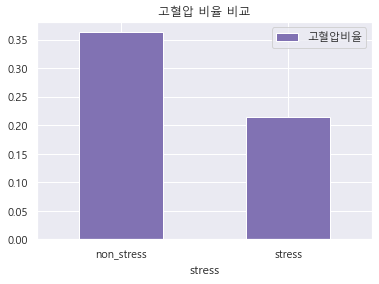

In [29]:
df1.plot(kind='bar',color='m')
plt.xticks(rotation=0)
plt.title('고혈압 비율 비교')

# 1-2 당뇨병과 스트레스의 상관관계

In [69]:
diabete_map={
    0.0:'정상',
    1.0:'당뇨병'}
total_data['diabete']=total_data['HE_DMdg'].map(diabete_map)

### <font color=red>스트레스와 당뇨병의 빈도표와 카이제곱검정 </font>

In [68]:
result=pd.crosstab(total_data.stress,total_data.diabete)
result

diabete,당뇨병,정상
stress,,
non_stress,294,2004
stress,144,1615


In [47]:
stats.chi2_contingency(result)

(21.484815902405657,
 3.566414742070887e-06,
 1,
 array([[ 248.096, 2049.904],
        [ 189.904, 1569.096]]))

### <font color=red>카이제곱검정 결과 스트레스와 당뇨병은 유의한 관련성이 있다. </font>

### 비율표 및 그래프

In [48]:
df2=total_data.groupby('stress').mean()[['HE_DMdg']]
df2.columns=['당뇨병비율']
df2

,당뇨병비율
stress,
non_stress,0.127937
stress,0.081865


Text(0.5, 1.0, '당뇨병 비율 비교')

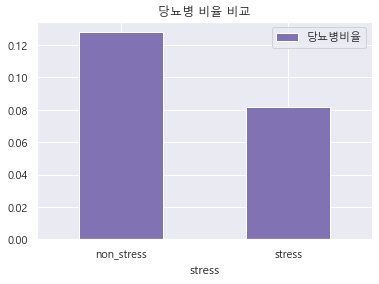

In [49]:
df2.plot(kind='bar',color='m')
plt.xticks(rotation=0)
plt.title('당뇨병 비율 비교')

# 1-3. 우울증과 스트레스의 상관관계

In [50]:
total_data['DF2_dg'].replace(8.0,np.NaN,inplace=True)
total_data['DF2_dg'].replace(9.0,np.NaN,inplace=True)

depress_map={
    0.0:'정상',
    1.0:'우울증'}
total_data['depress']=total_data['DF2_dg'].map(depress_map)

### <font color=red>스트레스와 우울증의 빈도표와 카이제곱검정 </font>

In [51]:
result=pd.crosstab(total_data.stress,total_data.depress)
result

depress,우울증,정상
stress,,
non_stress,53,2007
stress,126,1434


In [52]:
stats.chi2_contingency(result)

(56.053471143301884,
 7.052658103312213e-14,
 1,
 array([[ 101.862, 1958.138],
        [  77.138, 1482.862]]))

### <font color=red>카이제곱검정 결과 스트레스와 우울증의 유의한 관련성이 있다.</font>

### 비율표 및 그래프

In [53]:
df3=total_data.groupby('stress').mean()[['DF2_dg']]
df3.columns=['우울증비율']
df3

,우울증비율
stress,
non_stress,0.025728
stress,0.080769


Text(0.5, 1.0, '우울증 비율 비교')

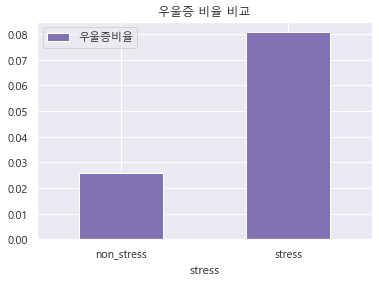

In [54]:
df3.plot(kind='bar',color='m')
plt.xticks(rotation=0)
plt.title('우울증 비율 비교')

# 1-4 심근경색증 또는 협심증과 스트레스의 상관관계

In [55]:
total_data.DI5_dg.replace(8.0,np.NaN,inplace=True)
total_data.DI5_dg.replace(9.0,np.NaN,inplace=True)

heart_map={
    0.0:'정상',
    1.0:'심근경색'}
total_data['heart']=total_data['DI5_dg'].map(heart_map)

### <font color=red>스트레스와 심근경색 및 협심증의 빈도표와 카이제곱검정</font>

In [56]:
result=pd.crosstab(total_data.stress,total_data.heart)
result

heart,심근경색,정상
stress,,
non_stress,36,2026
stress,14,1546


In [57]:
stats.chi2_contingency(result)

(4.0934233995897475,
 0.04305036280483706,
 1,
 array([[  28.465, 2033.535],
        [  21.535, 1538.465]]))

### <font color=red> 카이제곱검정 결과 스트레스와 심근경색증,협심증은 유의한 관련성이 있다.</font>

### 비율표 및 그래프

In [58]:
df4=total_data.groupby('stress').mean()[['DI5_dg']]
df4.columns=['심근경색증,협심증비율']
df4

,"심근경색증,협심증비율"
stress,
non_stress,0.017459
stress,0.008974


Text(0.5, 1.0, '심근경색증 또는 협심증 비율 비교')

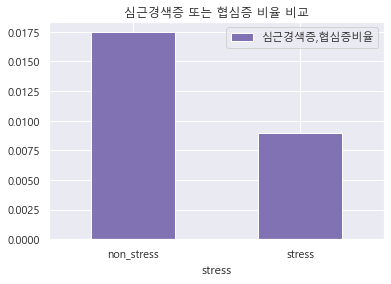

In [59]:
df4.plot(kind='bar',color='m')
plt.xticks(rotation=0)
plt.title('심근경색증 또는 협심증 비율 비교')

# 1-5 갑상선질환과 스트레스의 상관관계

In [60]:
total_data.DE2_dg.replace(8.0,np.NaN,inplace=True)
total_data.DE2_dg.replace(9.0,np.NaN,inplace=True)

In [61]:
thyroid_map={
    0.0:'정상',
    1.0:'갑상선'}
total_data['thyroid']=total_data['DE2_dg'].map(thyroid_map)

### <font color=red>스트레스와 갑상선질환의 빈도표와 카이제곱 검정</font>

In [62]:
result=pd.crosstab(total_data.stress,total_data.thyroid)
result

thyroid,갑상선,정상
stress,,
non_stress,69,1991
stress,59,1502


In [63]:
stats.chi2_contingency(result)

(0.3639107724101404,
 0.5463422741035548,
 1,
 array([[  72.82, 1987.18],
        [  55.18, 1505.82]]))

### <font color=red>카이검정 결과 p값이 크므로 유의한 관련성이 없다.</font> 

# 1-6 중이염과 스트레스의 상관관계

In [64]:
total_data.DH4_dg.replace(9.0,np.NaN,inplace=True)

ear_map={
    0.0:'정상',
    1.0:'중이염'}
total_data['ear']=total_data['DH4_dg'].map(ear_map)

### <font color=red>스트레스와 중이염의 빈도표와 카이제곱검정</font>

In [65]:
result=pd.crosstab(total_data.stress,total_data.ear)
result

ear,정상,중이염
stress,,
non_stress,2082,124
stress,1544,128


In [66]:
stats.chi2_contingency(result)

(6.148714370929056,
 0.013150766532266735,
 1,
 array([[2062.65,  143.35],
        [1563.35,  108.65]]))

### <font color=red>카이제곱검정 결과 스트레스와 중이염은 유의한 관련성이 있다.</font>

### 비율표 및 그래프 

In [18]:
df7=total_data.groupby('stress').mean()[['DH4_dg']]
df7.columns=['중이염비율']
df7

,중이염비율
stress,
non_stress,0.414273
stress,0.517908


Text(0.5, 1.0, '중이염 비율 비교')

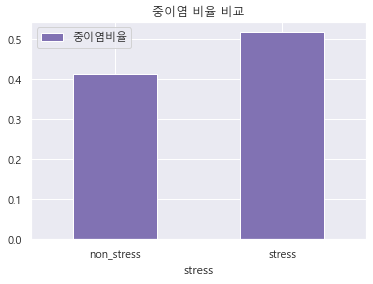

In [19]:
df7.plot(kind='bar',color='m')
plt.xticks(rotation=0)
plt.title('중이염 비율 비교')

<font color=red> 분석결과가 뚜렷하지 않다고 생각하여 스트레스가 가장 많은 집단을 따로 만들어 비교하였다.  
스트레스에 가장 영향을 많이 받을 거라 예측했던 우울증과 고혈압에 대해서만 분석.</font>

---

# 1-7 스트레스가 가장 많은 집단의 데이터셋을 따로 만들어 우울증 비율 비교

In [168]:
stress_map2={
    1.0:'high_stress',
    2.0:'stress',
    4.0:'non_stress'
}
total_data['stress2']=total_data['BP1'].map(stress_map2)

### <font color=red>중복없이 스트레스 응답을 3가지로 나누어서 우울증과 비교한 빈도표와 카이제곱검정</font>

In [167]:
result=pd.crosstab(total_data.depress,total_data.stress2)
result

stress2,high_stress,non_stress,stress
depress,,,
우울증,30,53,96
정상,240,2007,1194


In [165]:
stats.chi2_contingency(result)

(63.61383679145619,
 1.5361401993652706e-14,
 2,
 array([[  13.351,  256.649],
        [ 101.862, 1958.138],
        [  63.787, 1226.213]]))

### <font color=red>카이제곱검정 결과 유의한 관련성 확인</font>

### 비율표 및 그래프

In [170]:
df8=total_data.groupby('stress2').mean()[['DF2_dg']]
df8.columns=['우울증비율']
df8 

,우울증비율
stress2,
high_stress,0.111111
non_stress,0.025728
stress,0.074419


Text(0.5, 1.0, '우울증 비율 비교')

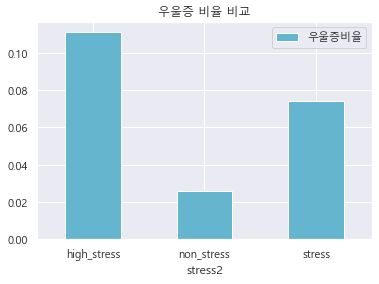

In [171]:
df8.plot(kind='bar',color='c')
plt.xticks(rotation=0)
plt.title('우울증 비율 비교')

스트레스가 더 높은 집단이 근소하지만 높은 우울증비율을 나타내는 경향이 있다.

# 1-8 스트레스가 가장 많은 집단의 데이터셋을 따로 만들어 고혈압 비율 비교

### <font color=red>중복없이 스트레스 응답을 세가지로 나누어서 고혈압과 비교한 빈도표와 카이제곱검정</font>

In [172]:
result=pd.crosstab(total_data.pressure,total_data.stress2)
result

stress2,high_stress,non_stress,stress
pressure,,,
고혈압,80,781,272
정상,204,1371,1090


In [174]:
stats.chi2_contingency(result)

(106.55139458510385,
 7.28884384873387e-24,
 2,
 array([[  84.721,  641.974,  406.305],
        [ 199.279, 1510.026,  955.695]]))

### <font color=red>카이제곱검정 결과 유의함을 확인</font>

### 비율표와 그래프

In [175]:
df9=total_data.groupby('stress2').mean()[['DI1_dg']]
df9.columns=['고혈압비율']
df9 

,고혈압비율
stress2,
high_stress,0.281690
non_stress,0.362918
stress,0.199706


Text(0.5, 1.0, '고혈압 비율 비교')

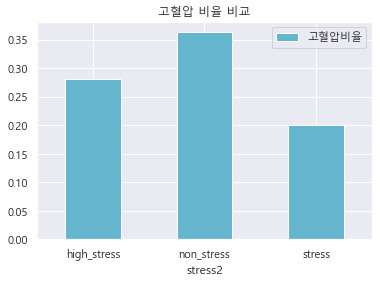

In [176]:
df9.plot(kind='bar',color='c')
plt.xticks(rotation=0)
plt.title('고혈압 비율 비교')

스트레스가 없는 집단이 고혈압 비율이 더 높다고 나타난다.

---

대체로 스트레스있는 경우와 없는 경우에서 질병발병 유무는 큰 차이가 없는 것으로 나타났다.
이러한 결과가 나온이유로 표본이 작았기 때문일 수도있고 다른 요인이 더욱 강하게 작용한것일 수도 있으며 스트레스 지수라는 것이 따로 있는 것이 아니라 본인 스스로 스트레스 정도를 인지해서 설문에 응하는 것이였기에 스스로의 상태를 파악하지 못했을 수도 있었을 수도 있겠다고 생각한다. 혹은 스트레스를 인지하더라도 어떻게 대처하느냐에 따라 달라질 수 있기에 이러한 결과가 나온것이라 추측한다. 
하지만 우울증의 경우는 상대적으로 스트레스 지수와 연관되는 경향을 나타내었다.

----

#   2-1. 세대별 스트레스비율 비교

In [31]:
age_bins=[total_data.age.min()-1,20,30,40,50,60,70,80,total_data.age.max()+1]
group_name=['10대','20대','30대','40대','50대','60대','70대','80대']
age_cut_data=pd.cut(total_data.age,age_bins, labels=group_name,right=False)
total_data['generation']=age_cut_data

Text(0.5, 1.0, '세대별 스트레스 비율')

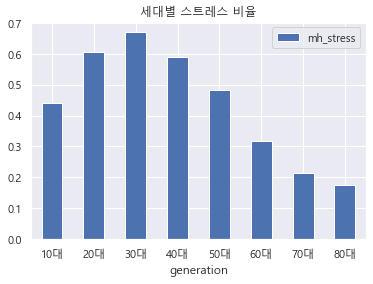

In [32]:
df1=total_data.groupby('generation').mean()[['mh_stress']]
df1.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('세대별 스트레스 비율')

# 2-2 성별별 스트레스 비율비교

In [33]:
total_data['sex2']=np.where(total_data.sex==1, '남성',' 여성')

Text(0.5, 1.0, '성별별 스트레스 비율')

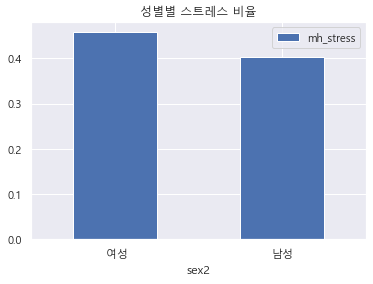

In [34]:
df9=total_data.groupby('sex2').mean()[['mh_stress']]
df9.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('성별별 스트레스 비율')

# 2-3 성별과 세대를 통틀어서 스트레스 비율비교

In [138]:
data_male=total_data[total_data['sex']==1]
data_female=total_data[total_data['sex']==2]

In [139]:
df2=data_male.groupby('generation').mean()[['mh_stress']]
df3=data_female.groupby('generation').mean()[['mh_stress']]

Text(0.5, 1.0, '성별과 세대에 따른 스트레스 비율')

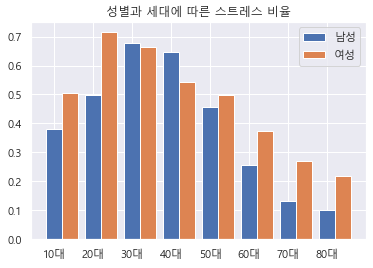

In [140]:
w=0.4
index=np.arange(len(df2.mh_stress))
plt.bar(index,df2.mh_stress,label='남성',width=w, align = 'center')
plt.bar(index+w,df3.mh_stress,label='여성',width=w, align = 'center')
plt.legend(loc = 'best')
plt.xticks([0,1,2,3,4,5,6,7],['10대','20대','30대','40대','50대','60대','70대','80대'])
plt.title('성별과 세대에 따른 스트레스 비율')

---

<font color=red>비교적 질병에 취약한 60대 이상의 인원수가 적은 것을 확인할 수 있었고 이러한 차이 때문에 앞선 분석에서 뚜렷한 결과가 나오지 않았을 수도 있겠다는 생각이들어 스트레스를 느끼는 비율이 비슷한 20~40대만을 가지고 다시한번 분석함.</font>

# <font color=red> 3-1 20대~40대에서 스트레스와 고혈압의 상관관계</font> 

In [71]:
id_new=total_data[(total_data['age']>=50) | (total_data['age']<20)].index
new_data=total_data.drop(id_new)

### <font color=red> 빈도표와 카이제곱검정</font>

In [85]:
result=pd.crosstab(new_data.pressure,new_data.stress)
result

stress,non_stress,stress
pressure,,
고혈압,24,51
정상,451,768


In [86]:
stats.chi2_contingency(result)

(0.5596377148743286,
 0.4544062495729,
 1,
 array([[ 27.531,  47.469],
        [447.469, 771.531]]))

### <font color=red> 카이제곱검정 결과 유의한 관련성 없음

# <font color=red> 3-2 20대~40대에서 스트레스와 당뇨병의 상관관계</font> 

### <font color=red> 빈도표와 카이제곱검정 </font>

In [87]:
result=pd.crosstab(new_data.diabete,new_data.stress)
result

stress,non_stress,stress
diabete,,
당뇨병,12,16
정상,463,803


In [88]:
stats.chi2_contingency(result)

(0.2345463980246436,
 0.6281730433283969,
 1,
 array([[ 10.278,  17.722],
        [464.722, 801.278]]))

### <font color=red> 카이제곱검정 결과 유의한 관련성없음</font>

# <font color=red> 3-3 20대~40대에서 스트레스와 우울증의 상관관계</font> 

### <font color=red> 빈도표와 카이제곱 검정</font>

In [75]:
result=pd.crosstab(new_data.depress,new_data.stress)
result

stress,non_stress,stress
depress,,
우울증,10,46
정상,454,740


In [76]:
stats.chi2_contingency(result)

(8.476011265357487,
 0.0035986027800755504,
 1,
 array([[ 20.787,  35.213],
        [443.213, 750.787]]))

### <font color=red> 카이제곱 검정결과 유의한 관련성 있음

### <font color=red>비율표와 그래프</font>

In [82]:
df10=new_data.groupby('stress').mean()[['DF2_dg']]
df10.columns=['20대~40대 우울증비율']
df10

,20대~40대 우울증비율
stress,
non_stress,0.021552
stress,0.058524


Text(0.5, 1.0, '20대~40대 우울증 비율 비교')

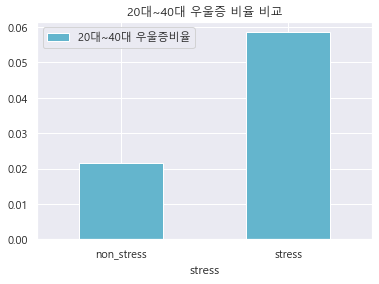

In [83]:
df10.plot(kind='bar',color='c')
plt.xticks(rotation=0)
plt.title('20대~40대 우울증 비율 비교')

# <font color=red> 3-4 20대~40대에서 스트레스와 심근경색의 상관관계</font> 

### <font color=red> 빈도표와 카이제곱 검정</font>

In [77]:
result=pd.crosstab(new_data.heart,new_data.stress)
result

stress,non_stress,stress
heart,,
심근경색,0,2
정상,464,784


In [89]:
stats.chi2_contingency(result)

(0.2345463980246436,
 0.6281730433283969,
 1,
 array([[ 10.278,  17.722],
        [464.722, 801.278]]))

### <font color=red> 카이제곱검정 결과 유의한 관련성없음</font>

# <font color=red> 3-5 20대~40대에서 스트레스와 중이염의 상관관계</font> 

### <font color=red> 빈도표와 카이제곱 검정</font>

In [79]:
result=pd.crosstab(new_data.ear,new_data.stress)
result

stress,non_stress,stress
ear,,
정상,439,722
중이염,25,64


In [80]:
stats.chi2_contingency(result)

(2.9440234680174875,
 0.08619578228717509,
 1,
 array([[430.963, 730.037],
        [ 33.037,  55.963]]))

### <font color=red> 카이제곱검정 결과 유의한 관련성없음</font>

<font color=red>20대~ 40대의 경우 우울증을 제외하고는 카이제곱 검정 결과 유의한 관련성이 존재하지 않다는 결과가 나옴. </font>